In [33]:
import control as co
import numpy as np

V_IN, V_OUT = 5, 170
V_Q, V_D = 0.8, 0.76
V_IN -= V_Q
V_OUT -= V_D
# D = 1 - (V_IN - V_Q) / (V_OUT + V_D)
D = 1 - V_IN / V_OUT
L = 33e-6
R_LOAD, C_OUT, R_ESR = 17e+3, 6.6e-6, 1.0e-3
f_s = 400e+3
R_FA = 4.503 * 10 ** 11 * f_s ** -1.26
w_s = 2 * np.pi * f_s
V_SL = 92e-3
R_SN = 0.01 # 외부 션트 저항
S_n = V_IN / L
S_f = (V_OUT - V_IN) / L
S_e = V_SL * f_s / R_SN
R_SL = 0.0e+3
K = 40e-6
# K = delta_V_SL / R_SL
S_e = (V_SL + K * R_SL) * f_s / R_SN # 

n = 1 + 2 * S_e / S_n
w_cL_e = w_s * L / ((1 - D) ** 3 * np.pi * n)

A_CM = (1 - D) * 1 / (1 / w_cL_e + 1 / R_LOAD + 1 / R_LOAD) / R_SN
w_z1 = 1 / (C_OUT * R_ESR)
w_z2 = R_LOAD * (V_IN / V_OUT) ** 2 / L
w_p1 = 2 / (C_OUT * R_LOAD)
Q = 1 / (np.pi * ((1 - D) * S_e / S_n + 1 / 2 - D))
G = A_CM * co.tf([1 / w_z1, 1], [1]) * co.tf([-1 / w_z2, 1], [1]) / co.tf([1 / w_p1, 1], [1]) / co.tf([1 / ((w_s / 2) ** 2), 1 / (Q * w_s / 2), 1], [1])

g_m = 800e-6
A_EA = 38
R_OUT_COMP = A_EA / g_m
f_p2, f_z3 = 10 ** 2, 10 ** 3
w_p2, w_z3 = 2 * np.pi * f_p2, 2 * np.pi * f_z3
R_C1 = f_p2 * R_OUT_COMP / (f_z3 - f_p2)
C_C1 = 1 / (2 * np.pi * f_z3 * R_C1)
# C_C1, R_C1 = 22e-9, 4.7e+3
# w_z3 = 1 / (C_C1 * R_C1)
# w_p2 = 1 / (C_C1 * (R_OUT_COMP + R_C1))
G_comp = A_EA * co.tf([1 / w_z3, 1], [1 / w_p2, 1])

V_ref = 1.26
R_FB1 = 330e+3
R_FB2 = V_ref * R_FB1 / (V_OUT - V_ref)
A_FB = R_FB2 / (R_FB1 + R_FB2)

G_loop = G * G_comp * A_FB


In [34]:
print(w_z1 * 2 * np.pi, w_z2 * 2 * np.pi, w_z3 * 2 * np.pi, w_p1 * 2 * np.pi, w_p2 * 2 * np.pi)


951997773.8150887 1993459.4107933247 39478.417604357426 111.9997380958928 3947.8417604357433


In [35]:
print(R_C1, C_C1)

5277.777777777777 3.015567342793807e-08


In [36]:
print(R_FB2)

2475.2946779378494


In [37]:
print(D)
print(D * (1 - D) ** 2 * V_OUT / f_s / (2 * 10e-3))
print(170 / 10e-3)


0.9751831718269912
1.2705500436531096e-05
17000.0


In [38]:
print((S_f - S_e) / (S_n + S_e) < 1)
# print(S_e > (S_f - S_n) / 2)
print(S_e, (S_f - S_n) / 2)

True
3680000.0 2436969.696969697


In [39]:
print(R_FA)

39346.52277584009


In [40]:
print(G_loop)

<TransferFunction>: sys[106]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


       -1.532e-14 s^3 - 2.317e-06 s^2 + 0.722 s + 4628
-------------------------------------------------------------
5.654e-17 s^4 + 5.414e-11 s^3 + 8.932e-05 s^2 + 0.05769 s + 1



In [28]:
print(co.poles(G_loop))

[-4.78434380e+05+1161997.09466441j -4.78434380e+05-1161997.09466441j
 -6.28318531e+02      +0.j         -1.78253119e+01      +0.j        ]


c:\Users\akswnd98\anaconda3\Lib\site-packages\control\freqplot.py:1737: UserWarning: number of encirclements does not match Nyquist criterion; check frequency range and indent radius/direction
  nyquist_responses = nyquist_response(


array([list([<matplotlib.lines.Line2D object at 0x0000018F9AD78F50>, None, <matplotlib.lines.Line2D object at 0x0000018F9AD78E90>, None])],
      dtype=object)

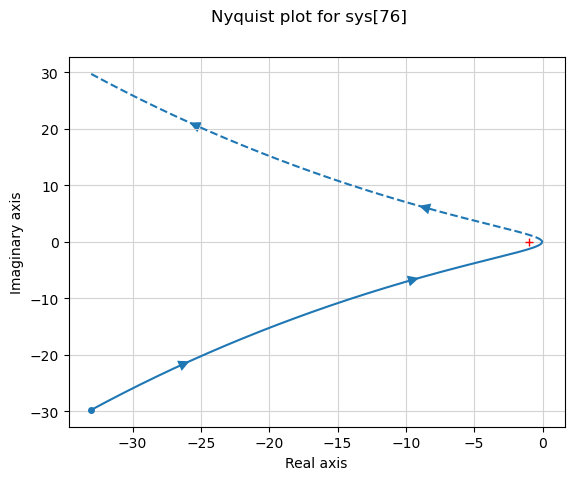

In [32]:
omega = np.linspace(1000, 1000000, 1000000)
co.nyquist_plot(G_loop, omega=omega, max_curve_magnitude=1e18)


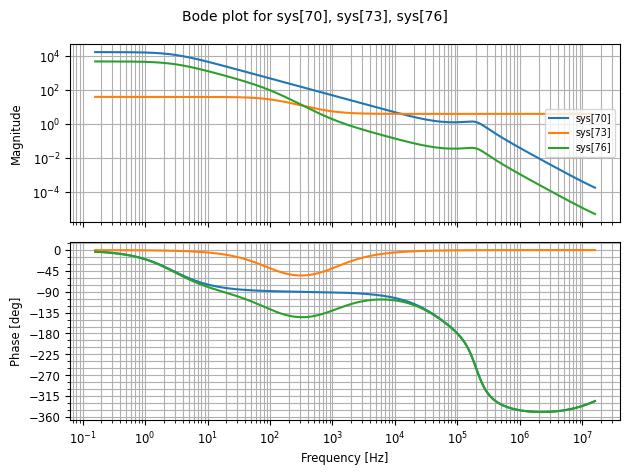

In [30]:
omega = np.logspace(0, 8, 10000)
mag, phase = co.bode(G, np.logspace(0, 8, 10000), Hz=True)
mag, phase = co.bode(G_comp, np.logspace(0, 8, 10000), Hz=True)
mag, phase = co.bode(G_loop, np.logspace(0, 8, 10000), Hz=True)
